In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing Data
we can use seaborn to create a simple heatmap to see where we are missing data!

In [5]:
train.isnull()
# this show 'true' only where value is NAN 
# and false where value is not NAn

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


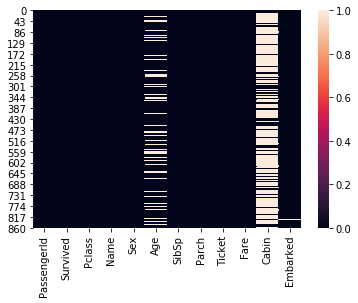

In [7]:
# use heatmap
sns.heatmap(train.isnull())

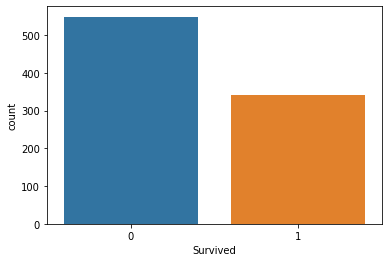

In [8]:
# check how many have survied
sns.countplot(x=train['Survived'])

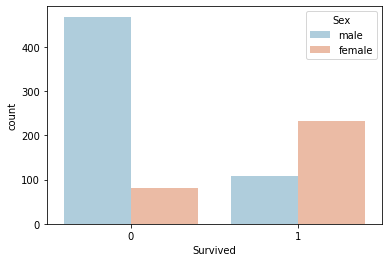

In [11]:
# how many male and female survived
sns.countplot(x=train['Survived'],hue=train['Sex'],palette='RdBu_r')

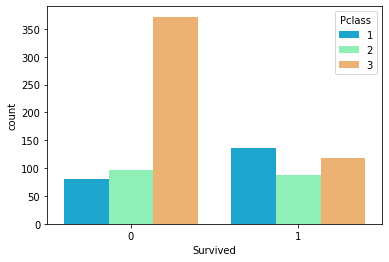

In [13]:
sns.countplot(x=train['Survived'],hue=train['Pclass'],palette='rainbow')

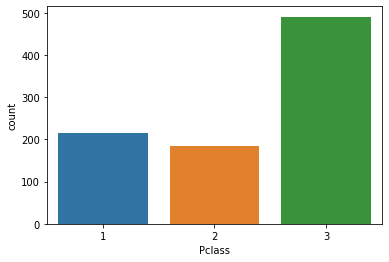

In [14]:
sns.countplot(x=train['Pclass'])

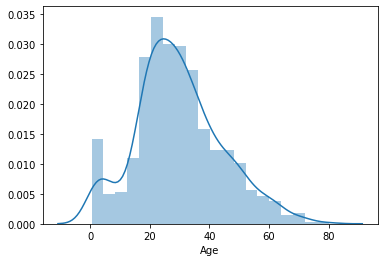

In [31]:
# sns.barplot(y=train['Age'],hue=train['Survived'])
sns.distplot(train['Age'].dropna())
#dropna() use for drop the N/A value
# curve show is know as KDE(kernal Distribution Estimation)


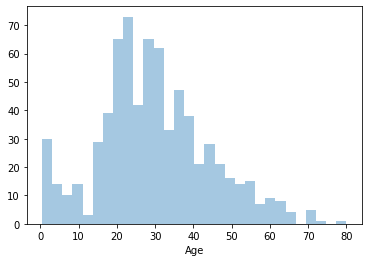

In [37]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

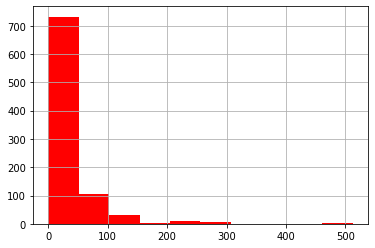

In [39]:
train['Fare'].hist(color='r')

## fill missing value(age)
we want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers(imputation,"In statistics, imputation is the process of replacing missing data with substituted values"). 
### use boxplot for this one

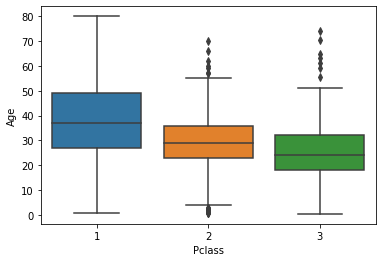

In [56]:
sns.boxplot(y=train['Age'],x=train['Pclass'])
#  Box plot 
# what show box plot
#  lower line of box is show 25%
#  middle show average (50%)
#  upper line show 75%


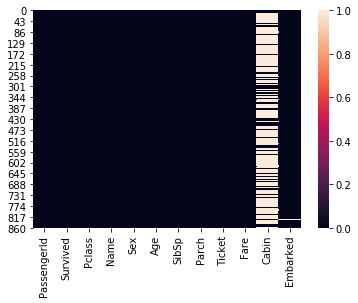

In [95]:
# now add average value to the null colum
# create method which assigne value to the N/A 
def imput_age(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age) :     
        if pclass==1:
            return 37
        elif pclass == 2:
            return 29
        elif pclass == 3:
            return 24
    else:
        return age

# apply function in single line using apply() method

train['Age'] = train[['Age','Pclass']].apply(imput_age,axis=1)

# axis : {0 or 'index', 1 or 'columns'}, default 0
#     Axis along which the function is applied:

#     * 0 or 'index': apply function to each column.
#     * 1 or 'columns': apply function to each row.

sns.heatmap(train.isnull())
# sns.boxplot(y=train['Age'],x=train['Pclass'])

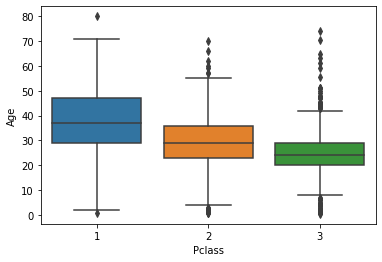

In [92]:
sns.boxplot(y=train['Age'],x=train['Pclass'])

In [42]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
 train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

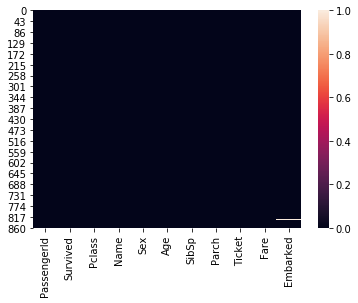

In [101]:
# drop the Cabin column and row in Embarked that is NAN
train.drop('Cabin',axis=1,inplace=True) # use inplace for doing update in itself
train.head()
sns.heatmap(train.isnull())